# Esonero 2 - 17 Maggio 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice descrivendo le operazioni effettuate


# Esercizio 1

Data la seguente immagine, costruire la feature pyramid di gaussiane e descrivere il procedimento

![](figure1.jpg)

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import convolve, correlate
from skimage import io
import cv2
from matplotlib import image as mp_image
import torch
import skimage
from skimage import color
import numpy.linalg as LA
import scipy.ndimage

# Required magic to display matplotlib plots in notebooks
%matplotlib inline
img_src = './'


In [7]:
def img_show(image, **argv):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, **argv)  # display the image
    plt.axis('off')
    plt.show()


def img_info(image):
    print(image.shape, image.dtype, type(image))

Shape (1200, 1920)


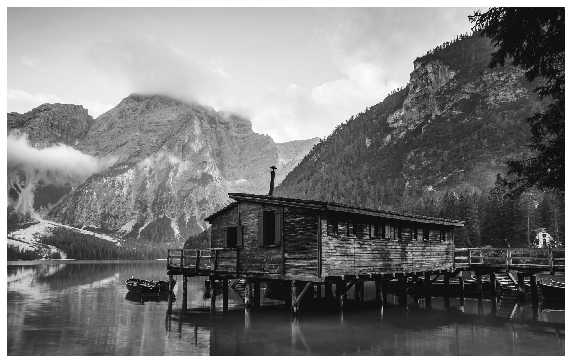

In [9]:
imageFull = mp_image.imread(os.path.join(img_src,'figure1.jpg'))

#image = color.rgb2gray(imageFull)
image = color.rgb2gray(imageFull)

print('Shape', image.shape)
img_show(image,cmap='gray')

La piramide Gaussiana è la raprresentazione di una immagine strutturata su più livelli, in cui ogni livello ha in genere dimensione pari ad un quarto del livello precedente.

Ogni livello della piramide è ottenuto da quello sottostante effettuando un filtraggio con un kernel gaussiano di deviazione standard sigma e poi una scalatura di un fattore 0.5

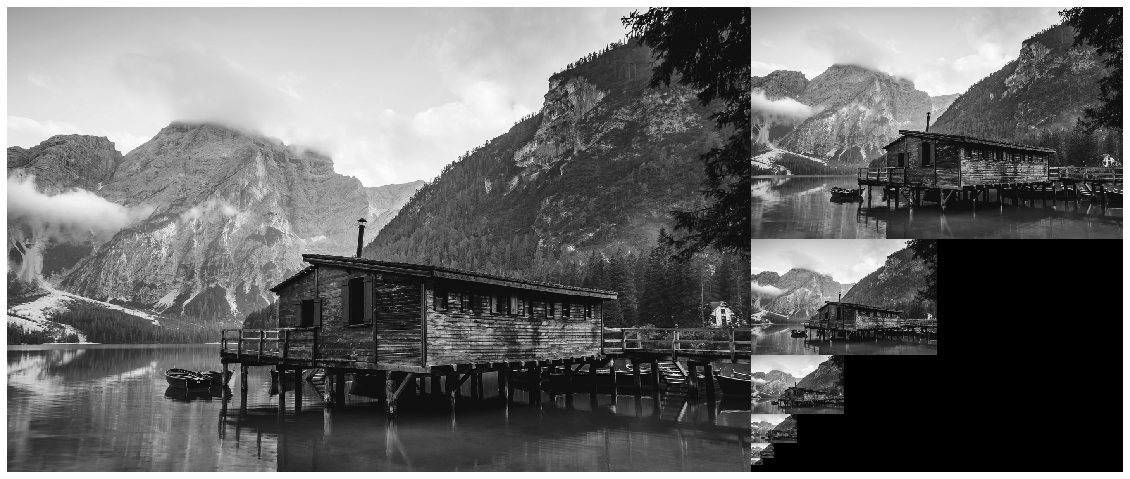

In [10]:
rows,cols = image.shape

output = np.zeros((rows,cols+cols//2))

output[:rows,:cols] = image

num_octave = 6

cur_scale = image

horiz = True
rows = 0

for i in range(num_octave):
    sigma = 2**(i-1)
    cur_scale = scipy.ndimage.gaussian_filter(image,sigma) #applico il filtro gaussiano e poi dimezziamo l'immagine
    cur_scale = cur_scale[::2**(i+1),::2**(i+1)] #butto via alcuni pixel e me ne tengo altri (SUBSAMPLING)
    rows_scaled, cols_scaled = cur_scale.shape
    output[rows:rows+rows_scaled,cols:cols+cols_scaled] = cur_scale
    rows += rows_scaled
        
        
plt.figure(figsize=(20, 20))

plt.imshow(output,cmap='gray')
plt.axis('off')
plt.show()

Proviamo a fare le stesse operazioni ma in sequenza. Questa volta, il filtro gaussiano è applicato sempre all'immagine precedente e non a quella originale, ragion per cui il $\sigma$ rimane fissato e non aumenta ad ogni iterazione (se invece lo dovessimo applicare all'immagine originale, dovrebbe sempre aumentare).

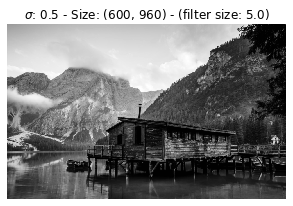

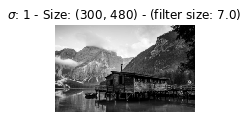

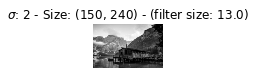

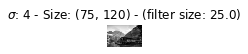

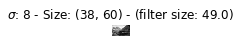

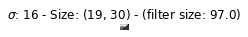

In [11]:
sz = 5

num_octave = 6

cur_scale = np.copy(image)
sigma = 1

for i in range(num_octave):
    cur_scale = scipy.ndimage.gaussian_filter(cur_scale,sigma) #applico il filtro sempre con lo stesso sigma e poi la dimezzo
    cur_scale = cur_scale[::2,::2]
    
    plt.figure(figsize=(sz, sz))
    plt.imshow(cur_scale,cmap='gray')
    s = 2*np.ceil(3*2**(i-1))+1
    plt.title(f'$\sigma$: {2**(i-1)} - Size: {cur_scale.shape} - (filter size: {s})')
    plt.axis('off')
    plt.show()
    
    sz = sz/2

I valori di sigma indicati sopra ogni immagine, sono da intendersi come se fosse applicati all'immagine originale; mentre in realtà, ad ogni immagine qui sopra viene applicato iterativamente un $\sigma$ pari a 1 per poi dimezzare l'immagine.

**CIOE':** Prendiamo l'immagine e applichiamo un filtro con $\sigma$ = 1 e poi dimezziamo (quindi è come aver applicato all'immagine originale il filtro con $\sigma$ = 0.5). Alla prima immagine ottenuta, riapplico il filtro con $\sigma$ = 1 e dimezzo (quindi è come aver applicato all'immagine originale il filtro con $\sigma$ = 1 averla dimezzata due volte). Riapplico il filtro con $\sigma$ = 1 alla seconda immagine e dimezzo (che corrisponde ad applicare un filtro con $\sigma$ = 2 all'immagine originale per poi dimezzarla).

Riplottiamo la piramide gaussiana applicando questa volta il filtro gaussiano con sigma costante all'immagine al livello precedente (e quindi sigma sarà costante)

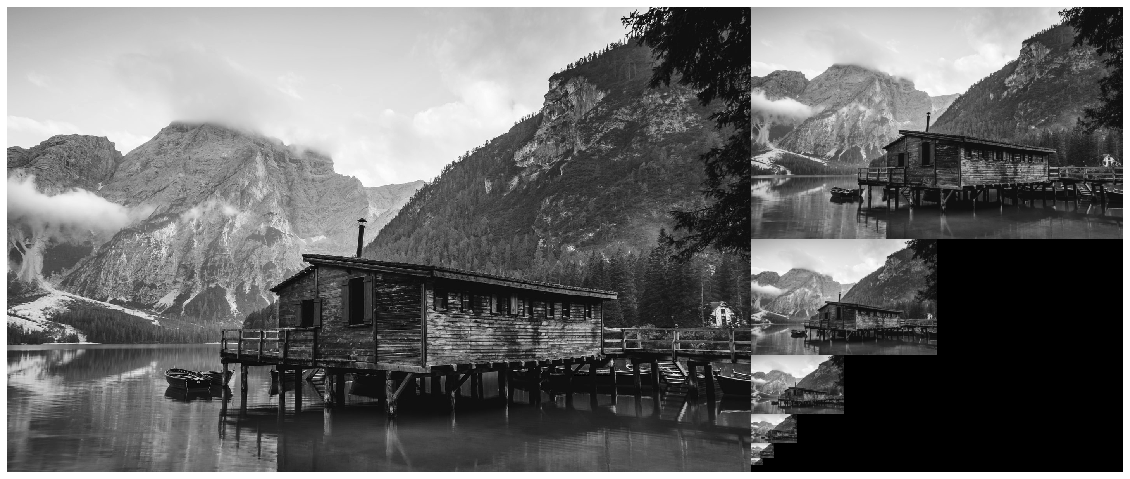

In [12]:
rows,cols = image.shape

output = np.zeros((rows,cols+cols//2))

output[:rows,:cols] = image

num_octave = 6
sigma = 1

cur_scale = image

horiz = True
rows = 0

for i in range(num_octave):
    cur_scale = scipy.ndimage.gaussian_filter(cur_scale,sigma)
    cur_scale = cur_scale[::2,::2]
    rows_scaled, cols_scaled = cur_scale.shape
    output[rows:rows+rows_scaled,cols:cols+cols_scaled] = cur_scale
    rows += rows_scaled
        
        
plt.figure(figsize=(20, 20))

plt.imshow(output,cmap='gray')
plt.axis('off')
plt.show()

**ATTENZIONE:** a differenza della piramide prima plottata, in questo caso applichiamo il filtro gaussiano iterativamente **non** all'immagine originale (come fatto prima) e quindi con valori crescenti di $\sigma$, bensì applichiamo iterativamente il filtro gaussiano con $\sigma$ costante ad ogni immagine ottenuta progressivamente (e quindi ad ogni immagine ottenuta dall'ottava precedente) andandola poi a dimezzare. Il concetto è sempre lo stesso.

# Esercizio 2


Data la seguente sequenza di tensori e la funzione *f*, calcolare il gradiente per i tensori a,b,c,d,e,y. 

Descrivere come viene costruito il grafo di computazione mostrando quali operazioni vengono effettuate, cioè calcolando le derivate parziali in maniera esplicita. 

$
y = f(a,b,c,d,e) = \sum \frac {a^3 + \exp(b^2) * \sin (c*d + 1)} {3e + 1}
$

*non sono necessarie librerie esterne*

In [61]:
a = torch.tensor([5, 6, 7, 8, 1, 2], dtype=torch.float, requires_grad=True).view(3, 2)
b = torch.tensor([3, 3, 0, 1, 6, 2], dtype=torch.float, requires_grad=True).view(3, 2)
c = torch.tensor([1, 5, 0, 7, 4, 3], dtype=torch.float, requires_grad=True).view(3, 2)
d = torch.tensor([2, 6, 3, 8, 3, 1], dtype=torch.float, requires_grad=True).view(3, 2)
e = torch.tensor([5, 2, 1, 1, 1, 1], dtype=torch.float, requires_grad=True).view(3, 2)

In [23]:
a

tensor([[5., 6.],
        [7., 8.],
        [1., 2.]], grad_fn=<ViewBackward>)

In [24]:
b

tensor([[3., 3.],
        [0., 1.],
        [6., 2.]], grad_fn=<ViewBackward>)

In [25]:
c

tensor([[1., 5.],
        [0., 7.],
        [4., 3.]], grad_fn=<ViewBackward>)

In [26]:
d

tensor([[2., 6.],
        [3., 8.],
        [3., 1.]], grad_fn=<ViewBackward>)

In [27]:
e

tensor([[5., 2.],
        [1., 1.],
        [1., 1.]], grad_fn=<ViewBackward>)

In [66]:
r1 = a**3
a.retain_grad()

r2 = torch.exp(b**2)
b.retain_grad()

r3 = torch.sin(c*d+1)
c.retain_grad()
d.retain_grad()

den = 3*e+1
e.retain_grad()

z = (r1 + r2 * r3)/den

out = torch.sum(z)

out.backward()

In [70]:
a.grad #dout/da = dout/dr1 * dr1/a (tramite regola della catena)

tensor([[ 9.3750, 30.8571],
        [73.5000, 96.0000],
        [ 1.5000,  6.0000]])

In [72]:
b.grad #dout/db = dout/dr2 * dr2/b (e così via)

tensor([[ 4.2882e+02, -2.8062e+03],
        [ 0.0000e+00,  5.9281e-01],
        [ 5.4343e+15, -4.1320e+01]])

In [73]:
c.grad

tensor([[-1.0027e+03,  6.3533e+03],
        [ 4.0523e-01,  4.8922e+00],
        [ 2.9342e+15, -8.9219e+00]])

In [74]:
d.grad

tensor([[-5.0137e+02,  5.2945e+03],
        [ 0.0000e+00,  4.2807e+00],
        [ 3.9122e+15, -2.6766e+01]])

In [75]:
e.grad

tensor([[-1.4865e+01,  1.8722e+02],
        [-6.4470e+01, -9.6222e+01],
        [-3.3964e+14,  6.2475e+00]])

# Esercizio 3

Dati due batch A e B, mostrare gli effetti della BN.

Suggerimento: calcolare gli istogrammi di A e B

In [186]:
m = nn.BatchNorm2d(3)
input1 = torch.randn(20, 3, 35, 45)
input2 = torch.randn(30, 3, 50, 50)
output1 = m(input1)
output2 = m(input2)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


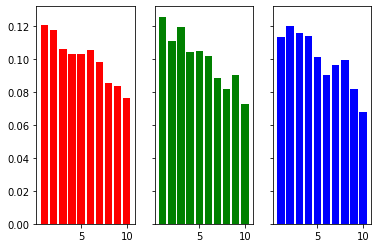

In [187]:
r_image = input1[0]
g_image = input1[1]
b_image = input1[2]

# Compute histograms for each channel.
hist_r = torch.histc(r_image, bins = 10, min = 0.0, max = 1.0)
hist_g = torch.histc(g_image, bins = 10, min = 0.0, max = 1.0)
hist_b = torch.histc(b_image, bins = 10, min = 0.0, max = 1.0)

# Normalize the histograms so that they sum to 1.
hist_r = hist_r.div(hist_r.sum())
hist_g = hist_g.div(hist_g.sum())
hist_b = hist_b.div(hist_b.sum())

# Plot the histograms.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True)
ax1.bar(np.linspace(1.0, 10.0, num = 10), hist_r.numpy(), color='r')
ax2.bar(np.linspace(1.0, 10.0, num = 10), hist_g.numpy(), color='g')
ax3.bar(np.linspace(1.0, 10.0, num = 10), hist_b.numpy(), color='b')
fig.show();

c:\python\python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


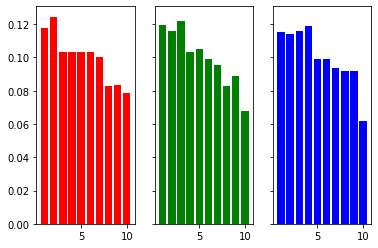

In [188]:
r_image = output1[0]
g_image = output1[1]
b_image = output1[2]

# Compute histograms for each channel.
hist_r = torch.histc(r_image, bins = 10, min = 0.0, max = 1.0)
hist_g = torch.histc(g_image, bins = 10, min = 0.0, max = 1.0)
hist_b = torch.histc(b_image, bins = 10, min = 0.0, max = 1.0)

# Normalize the histograms so that they sum to 1.
hist_r = hist_r.div(hist_r.sum())
hist_g = hist_g.div(hist_g.sum())
hist_b = hist_b.div(hist_b.sum())

# Plot the histograms.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True)
ax1.bar(np.linspace(1.0, 10.0, num = 10), hist_r.detach().numpy() , color='r')
ax2.bar(np.linspace(1.0, 10.0, num = 10), hist_g.detach().numpy() , color='g')
ax3.bar(np.linspace(1.0, 10.0, num = 10), hist_b.detach().numpy() , color='b')
fig.show();

c:\python\python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


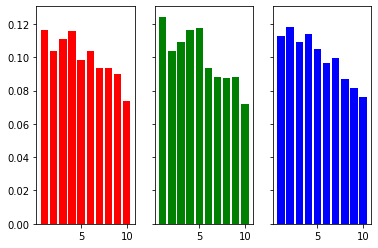

In [189]:
r_image = input2[0]
g_image = input2[1]
b_image = input2[2]

# Compute histograms for each channel.
hist_r = torch.histc(r_image, bins = 10, min = 0.0, max = 1.0)
hist_g = torch.histc(g_image, bins = 10, min = 0.0, max = 1.0)
hist_b = torch.histc(b_image, bins = 10, min = 0.0, max = 1.0)

# Normalize the histograms so that they sum to 1.
hist_r = hist_r.div(hist_r.sum())
hist_g = hist_g.div(hist_g.sum())
hist_b = hist_b.div(hist_b.sum())

# Plot the histograms.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True)
ax1.bar(np.linspace(1.0, 10.0, num = 10), hist_r.numpy(), color='r')
ax2.bar(np.linspace(1.0, 10.0, num = 10), hist_g.numpy(), color='g')
ax3.bar(np.linspace(1.0, 10.0, num = 10), hist_b.numpy(), color='b')
fig.show();

c:\python\python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


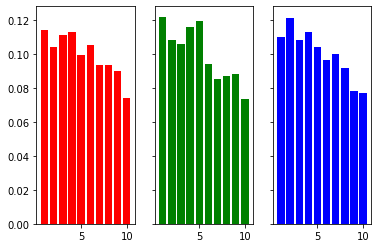

In [190]:
r_image = output2[0]
g_image = output2[1]
b_image = output2[2]

# Compute histograms for each channel.
hist_r = torch.histc(r_image, bins = 10, min = 0.0, max = 1.0)
hist_g = torch.histc(g_image, bins = 10, min = 0.0, max = 1.0)
hist_b = torch.histc(b_image, bins = 10, min = 0.0, max = 1.0)

# Normalize the histograms so that they sum to 1.
hist_r = hist_r.div(hist_r.sum())
hist_g = hist_g.div(hist_g.sum())
hist_b = hist_b.div(hist_b.sum())

# Plot the histograms.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True)
ax1.bar(np.linspace(1.0, 10.0, num = 10), hist_r.detach().numpy() , color='r')
ax2.bar(np.linspace(1.0, 10.0, num = 10), hist_g.detach().numpy() , color='g')
ax3.bar(np.linspace(1.0, 10.0, num = 10), hist_b.detach().numpy() , color='b')
fig.show();

# Esercizio 4

Dato il seguente frammento di codice

In [57]:
conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)
conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

model = lambda x: conv2(conv1(x))

Indicare giustificando la risposta qual'è il risultato per un'immagine 1x3x400x400 illustrandolo con un esempio. 

**RISPOSTA**

Applicando il primo filtro convoluzionale di dimensione 3x3 con padding = 1 e stride = 2, sostanzialmente accade che:
applicando il kernel 3x3 andiamo a perdere 1 "striscia" (risultato della parte inferiore della divisione 3//2) di pixel per ogni lato che però compensiamo con il padding = 1 che viene inserito quindi l'immagine rimarrebbe uguale se non fosse per la stride con la quale la dimensione viene dimezzata, diventanto 200x200.
L'output del primo livello sarà un'immagine 1x10x200x200.

Applicando poi il secondo filtro convoluzionale, di dimensione 3x5, perdiamo 1 striscia di pixel sopra e 1 sotto (3//2 prendendo la parte bassa) e 2 strisce di pixel su ciascun lato (5//2 sempre parte inferiore). Quindi al momento il risultato sarà un'immagine 1x30x198x196.

Applicando poi il padding = (0,1), recuperiamo 1 striscia di pixel per ogni lato, ottenendo un'immagine di dimensione 198x198. Infine, con lo stride = (3,4) dividiamo per 3 la prima dimensione e per 4 la seconda ottenendo in output un'immagine di dimensione (66,50)

Quindi infine, il tensore in output avrà size ([1,30,66,50])


In [58]:
img = torch.rand(1,3,400,400)

out = model(img)

out.shape

torch.Size([1, 30, 66, 50])

# Esercizio 5

Adattare/semplificare la rete VGG affinché gestisca un input di immagini 400x400

In [79]:
import torch
import torch.nn as nn
from torch.nn import functional as F

In [84]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def test(net,img_size=32):
    x = torch.randn(1,3,img_size,img_size)
    y = net(x)
    print("Input: {}; Output: {}; N. of params: {:,}".format(list(x.size()), list(y.size()), count_parameters(net)))

In [164]:
class VGG(nn.Module):

    def __init__(self, features, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        self.features = features
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)


def make_layers(cfg, batch_norm=False):
    layers = []
    in_channels = 3
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)


cfg = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

In [161]:
vgg16 = VGG(make_layers(cfg['D']))

In [162]:
test(vgg16, 224)

torch.Size([1, 512, 7, 7])
torch.Size([1, 25088])
Input: [1, 3, 224, 224]; Output: [1, 1000]; N. of params: 138,357,544


In [163]:
test(vgg16,400)

torch.Size([1, 512, 12, 12])
torch.Size([1, 73728])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x73728 and 25088x4096)

Senza il livello di MaxPooling e passando un'immagine 400x400, l'output del blocco features è come indicato sopra (([1, 512, 12, 12]), ma dovrebbe essere ([1, 512, 7, 7]). Per arrivare a questa dimensione, aggiungiamo un livello di Max pooling nn.MaxPool2d(2,2, padding = 1) quando costruiamo i livelli in modo tale da ottenere la stessa shape.
Vediamo di seguito:

In [165]:
class VGG(nn.Module):

    def __init__(self, features, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        self.features = features
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)


def make_layers(cfg, batch_norm=False):
    layers = []
    in_channels = 3
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    pool =  nn.MaxPool2d(2,2, padding = 1) #MODIFICA
    layers.append(pool)
    return nn.Sequential(*layers)


cfg = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

In [166]:
vgg16 = VGG(make_layers(cfg['D']))

In [167]:
test(vgg16,400)

torch.Size([1, 512, 7, 7])
torch.Size([1, 25088])
Input: [1, 3, 400, 400]; Output: [1, 1000]; N. of params: 138,357,544


# Esercizio 6

Data la seguente immagine, calcolare la IoU tra i due box mostrati in figura. 
Descrivere tutte le operazioni effettuate

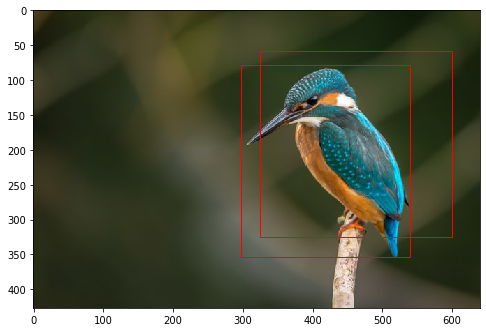

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import matplotlib.patches as patches

def plot_bbox(image_np, bbox_list):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(8, 8)

    ax.imshow(image_np)

    for bbox_idx in range(bbox_list.shape[0]):
        x1, y1, x2, y2 = bbox_list[bbox_idx, :].tolist()

        w = x2 - x1
        h = y2 - y1

        rect = patches.Rectangle((x1, y1), w, h,
                                 linewidth=1, 
                                 edgecolor='r', 
                                 facecolor='none')

        ax.add_patch(rect)

    plt.show();

imageBB1 = mp_image.imread('figure2.jpg')

bb1 = [297, 79, 540, 354]
bb2 = [325, 59, 600, 325]

plot_bbox(imageBB1, np.asarray([bb1, bb2], dtype = np.int32))

In [142]:
def compute_iou_score(box1,box2):
    yv1 = box1[0]
    xv1 = box1[1]
    yv2 = box1[2]
    xv2 = box1[3]
    anchor_area = (yv2 - yv1) * (xv2 - xv1)
    
    yt1 = box2[0]
    xt1 = box2[1]
    yt2 = box2[2]
    xt2 = box2[3]
          
    box_area = (yt2 - yt1) * (xt2 - xt1)
    
    inter_x1 = max(xt1, xv1)
    inter_y1 = max(yt1, yv1)
    inter_x2 = min(xt2, xv2)
    inter_y2 = min(yt2, yv2)
    
    if (inter_x1 < inter_x2) and (inter_y1 < inter_y2):
        iter_area = (inter_y2 - inter_y1) * (inter_x2 - inter_x1)
        iou = iter_area / (anchor_area + box_area - iter_area)

    return iou

In [143]:
iou_scores =  compute_iou_score(np.array(bb1),np.array(bb2))

In [144]:
iou_scores

0.6073376586094046

La strategia per calcolare il valore IoU tra 2 box è la seguente:

    - Find the max of x1 and y1 in both the boxes (xn1, yn1)
    - Find the min of x2 and y2 in both the boxes (xn2, yn2)
    - Now both the boxes are intersecting only
     if (xn1 < xn2) and (yn2 < yn1)
          - iou_area will be (xn2 - xn1) * (yn2 - yn1)
     else
          - iuo_area will be 0- similarly calculate area for anchor box and ground truth object
    - iou = iou_area/(anchor_box_area + ground_truth_area - iou_area)
